<a href="https://colab.research.google.com/github/VaishnaviDayal7/YULU-Project/blob/main/YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='purple'> Problem Statement: </font>**

Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is
essential to tailor their services and strategies accordingly.

Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make
informed adjustments to regain profitability.

# **<font color='purple'> Objective: </font>**

To understand the factors affecting the demand for the shared electric cycles.

# **<font color='purple'> Goals: </font>**

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands?

In [ ]:
!gdown 10I7JYPcQ239emcCJ89v6WX3NJwXsu5qy

Downloading...
From: https://drive.google.com/uc?id=10I7JYPcQ239emcCJ89v6WX3NJwXsu5qy
To: /content/bike_sharing.txt
100% 648k/648k [00:00<00:00, 104MB/s]


In [ ]:
#first, we import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

In [ ]:
data = pd.read_csv('bike_sharing.txt')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 10886
Number of columns: 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Insights:

1. The dataset has 10886 entries with no missing values in any of the columns.

2. It includes various types of data such as timestamps, integers, and floating-point numbers.

3. The dataset covers aspects like season, weather, temperature, humidity, wind speed, and user counts (casual, registered, total).

In [ ]:
round(data.describe(),2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00


# Null Value Detection

In [ ]:
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows.shape[0])

0


We can observe that there are no missing values and duplicate data points

# Outlier Detection and Treatment

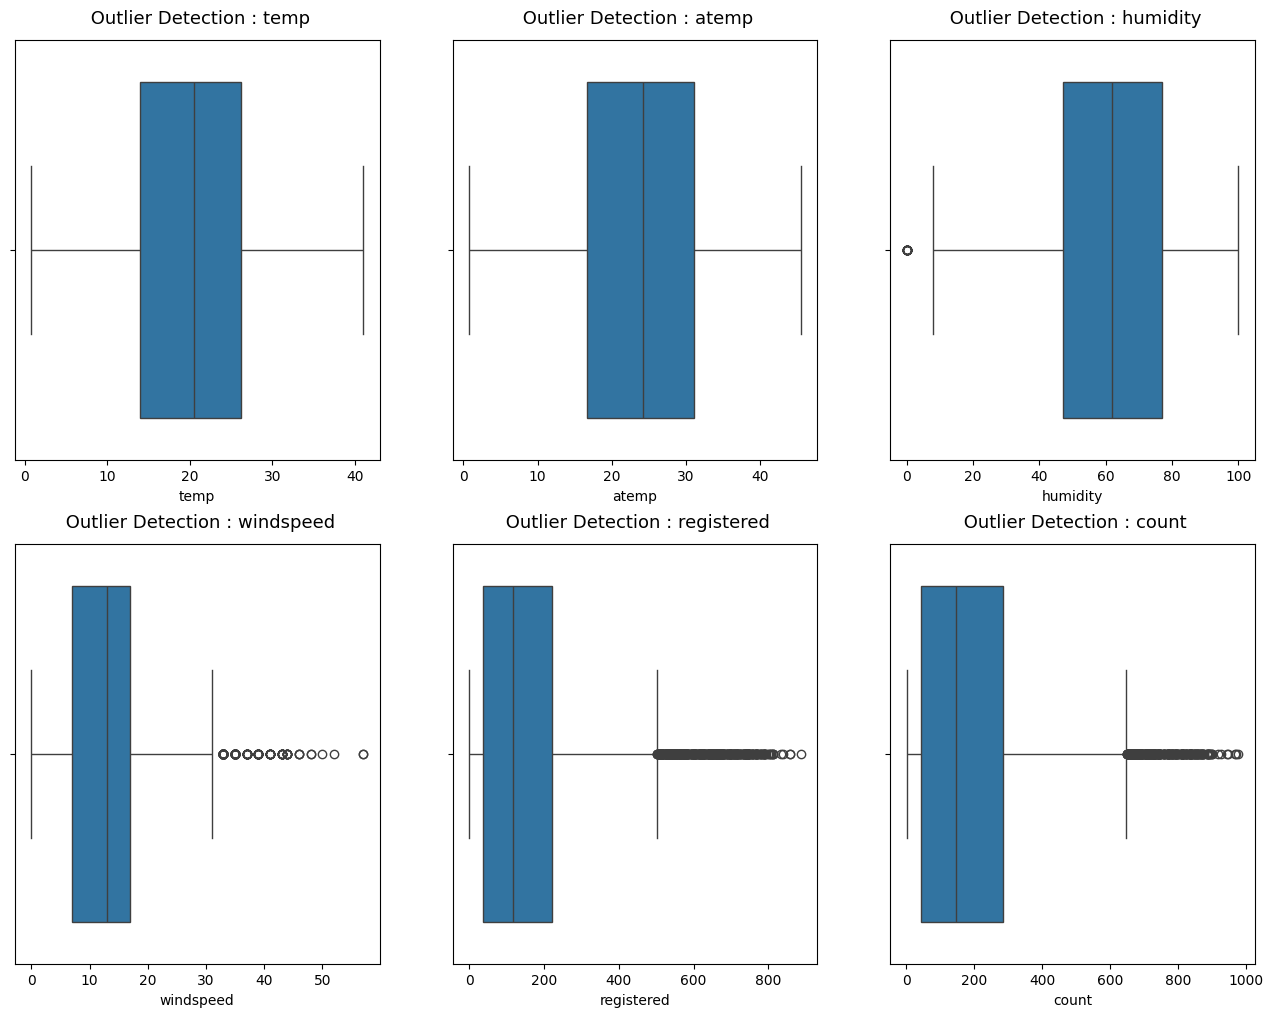

In [ ]:
col2 = ['temp', 'atemp', 'humidity', 'windspeed','registered','count']
row = 2
column = 3
ind = 0

fig, ax = plt.subplots(row,column,figsize = (16,12))

for i in range(row):
  for j in range(column):
    sns.boxplot(data=data,x=col2[ind], ax=ax[i,j])
    ax[i,j].set_title(f" Outlier Detection : {col2[ind]}", pad=12, fontsize=13)
    ind = ind + 1

In [ ]:
#since there are quite a few outliers in the Humidity and Windspeed column, we will clip the data such that outliers are removed

#humidity column
iqr = np.percentile(data['humidity'],75) - np.percentile(data['humidity'],25)
upper = np.percentile(data['humidity'],75) + (1.5 * iqr)
lower = np.percentile(data['humidity'],25) - (1.5 * iqr)

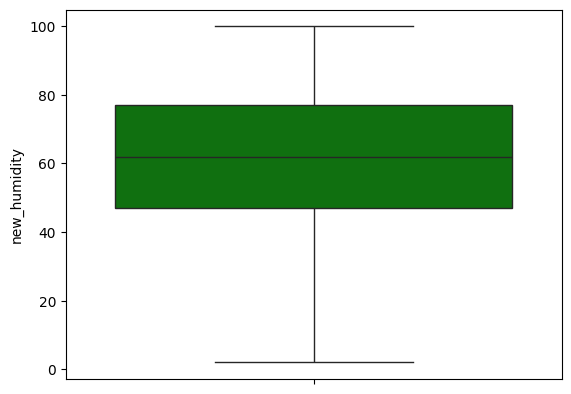

In [ ]:
#we clip the data such that the outliers are replaced with lower or upper values
data['new_humidity'] = np.clip(data['humidity'],upper,lower)
sns.boxplot(data=data,y='new_humidity',color='green')
plt.show()

In [ ]:
#windspeed column

iqr = np.percentile(data['windspeed'],75) - np.percentile(data['windspeed'],25)
upper = np.percentile(data['windspeed'],75) + (1.5*iqr)
lower = np.percentile(data['windspeed'],25) - (1.5*iqr)

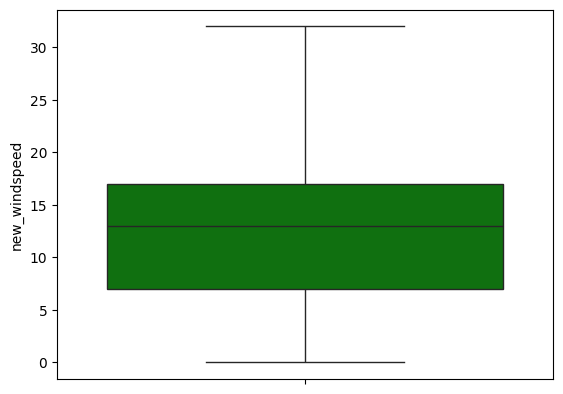

In [ ]:
#we clip the data such that the outliers are replaced with lower or upper values
data['new_windspeed'] = np.clip(data['windspeed'],upper,lower)
sns.boxplot(data=data,y='new_windspeed',color='green')
plt.show()

In [ ]:
#total users column

iqr = np.percentile(data['count'],75) - np.percentile(data['count'],25)
upper = np.percentile(data['count'],75) + (1.5*iqr)
lower = np.percentile(data['count'],25) - (1.5*iqr)

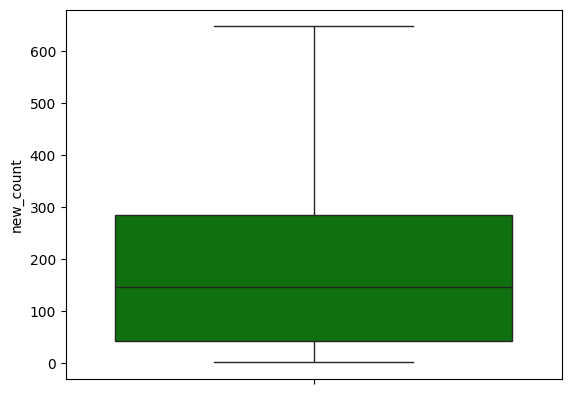

In [ ]:
#we clip the data such that the outliers are replaced with lower or upper values
data['new_count'] = np.clip(data['count'],upper,lower)
sns.boxplot(data=data,y='new_count',color='green')
plt.show()

In [ ]:
#registered column

iqr = np.percentile(data['registered'],75) - np.percentile(data['registered'],25)
upper = np.percentile(data['registered'],75) + (1.5*iqr)
lower = np.percentile(data['registered'],25) - (1.5*iqr)

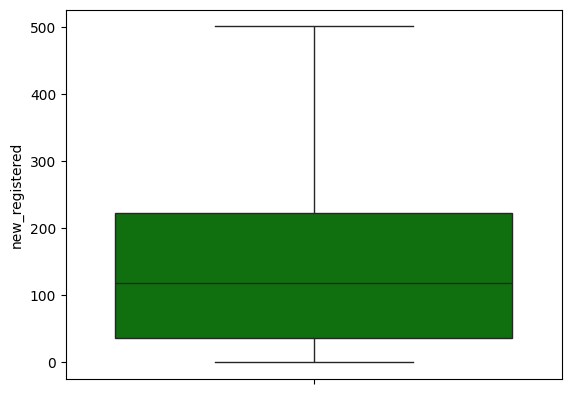

In [ ]:
#we clip the data such that the outliers are replaced with lower or upper values
data['new_registered'] = np.clip(data['registered'],upper,lower)
sns.boxplot(data=data,y='new_registered',color='green')
plt.show()

In [ ]:
#casual column

iqr = np.percentile(data['casual'],75) - np.percentile(data['casual'],25)
upper = np.percentile(data['casual'],75) + (1.5*iqr)
lower = np.percentile(data['casual'],25) - (1.5*iqr)

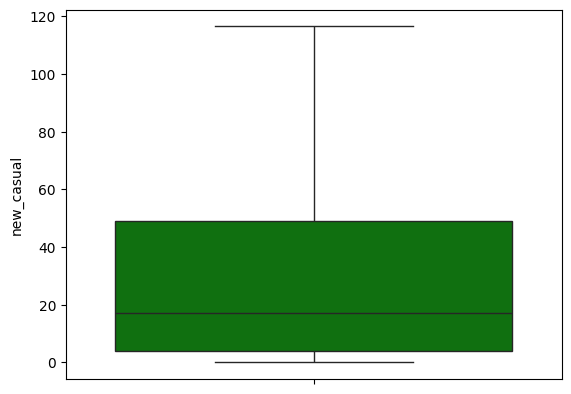

In [ ]:
#we clip the data such that the outliers are replaced with lower or upper values
data['new_casual'] = np.clip(data['casual'],upper,lower)
sns.boxplot(data=data,y='new_casual',color='green')
plt.show()

# Visual and Non Visual Analysis

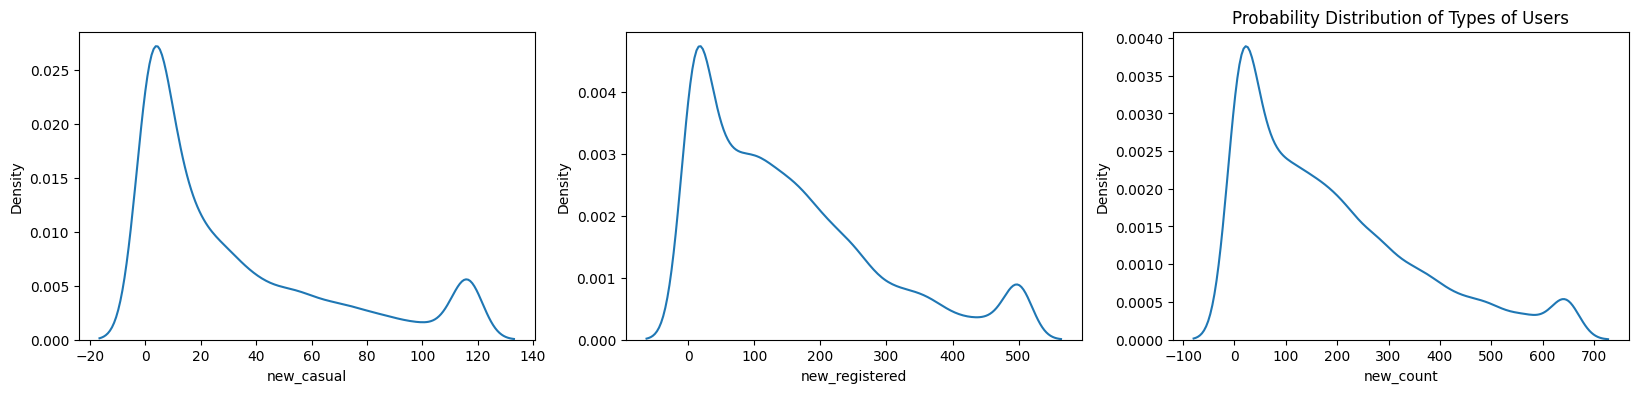

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.kdeplot(data=data, x='new_casual')
plt.subplot(1,3,2)
sns.kdeplot(data=data, x='new_registered')
plt.subplot(1,3,3)
sns.kdeplot(data=data, x='new_count')
plt.title('Probability Distribution of Types of Users')
plt.show()

# **Insights**

1. **new_casual:**

Distribution Shape: The distribution is right-skewed, indicating that most new casual users have lower values.

Peaks: There is a primary peak around 0, suggesting that a significant number of instances have very few or no new casual users.

Secondary Peak: A secondary peak around 120 might indicate occasional surges in new casual users, possibly on weekends or holidays.

2. **new_registered:**

Distribution Shape: Similar to the new_casual plot, this distribution is also right-skewed.

Peaks: The primary peak around 0 implies that many instances have low new registered users.

Secondary Peak: A secondary peak around 500 may suggest periods of increased registrations, possibly due to promotions or favorable conditions for biking.

3. **new_count:**

Distribution Shape: The distribution is right-skewed, highlighting that the majority of total new users (both casual and registered) are low.

Peaks: The primary peak around 0 confirms that many instances have few new users overall.

Secondary Peak: The secondary peak around 600 indicates occasional high user counts, likely influenced by factors that drive both casual and registered users to use the service simultaneously.

# **Overall Insights**:

Right-Skewness Across All Plots: Indicates that most days have fewer new users, with occasional spikes in user numbers.

Primary Peaks at Low Values: Suggest that low user days are more common, which could be typical weekdays or periods of poor weather.

Secondary Peaks: Highlight periods of increased activity, possibly weekends, holidays, or during specific events/promotions that attract more users.

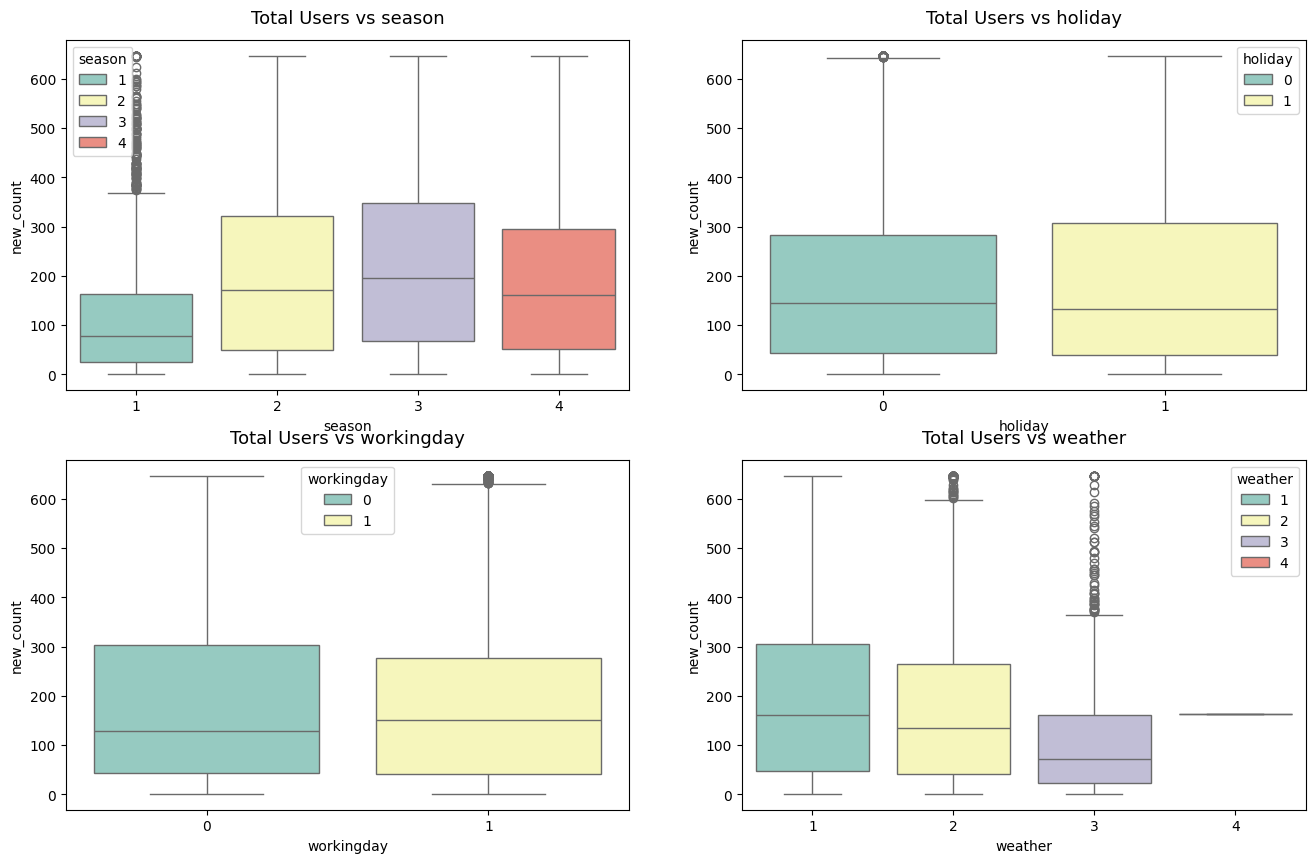

In [ ]:
col = ['season', 'holiday', 'workingday', 'weather']
row = 2
column = 2
ind = 0

fig, ax = plt.subplots(row,column,figsize = (16,10))

for i in range(row):
  for j in range(column):
    sns.boxplot(data=data,x=col[ind],y='new_count',hue=col[ind],ax=ax[i,j],palette='Set3')
    ax[i,j].set_title(f"Total Users vs {col[ind]}", pad=12, fontsize=13)
    ind = ind + 1

- **Total Users vs Season**

Season 1: This season (spring) shows the lowest median number of total users, with a relatively narrow interquartile range (IQR), indicating consistent but lower usage. There are a few outliers indicating occasional high usage days.

Season 2: The median number of users increases compared to Season 1 (summer). The wider IQR suggests more variability in usage.

Season 3: This season (fall) has the highest median number of users, indicating it's the most popular season for renting bicycles. The IQR is also wider, suggesting significant variability in usage.

Season 4: Winter shows a median user count similar to Summer but with a slightly narrower IQR. This indicates moderate usage with less variability compared to fall.

- **Total Users vs Holiday**

Non-Holiday (0): The median number of users is lower on non-holidays, with a relatively consistent IQR. This suggests that regular days have a steadier but lower number of users.

Holiday (1): The median is slightly higher on holidays, with a wider IQR indicating more variability in user counts. This suggests that holidays tend to see an increase in bicycle rentals, possibly due to leisure activities.

- **Total Users vs Workingday**

Non-Working Day (0): The median number of users is higher on non-working days compared to working days. The wider IQR indicates more variability, with many outliers suggesting occasional high rental days.

Working Day (1): The median user count is lower, with a narrower IQR. This shows that bicycle rentals are generally lower on working days, possibly due to work commitments and less leisure time.

- **Total Users vs Weather**

Weather 1: This category (clear or partly cloudy) shows the highest median number of users, indicating that good weather conditions are highly favorable for bicycle rentals.

Weather 2: The median number of users decreases under moderate weather conditions (e.g., mist or cloudy). The narrower IQR suggests less variability compared to clear weather.

Weather 3: Significantly lower median user counts are observed under adverse weather conditions (e.g., light rain or snow), indicating poor weather significantly reduces bicycle rentals.

Weather 4: This category (heavy rain or storm) has very few data points with minimal user rentals, indicating extremely unfavorable conditions for biking.

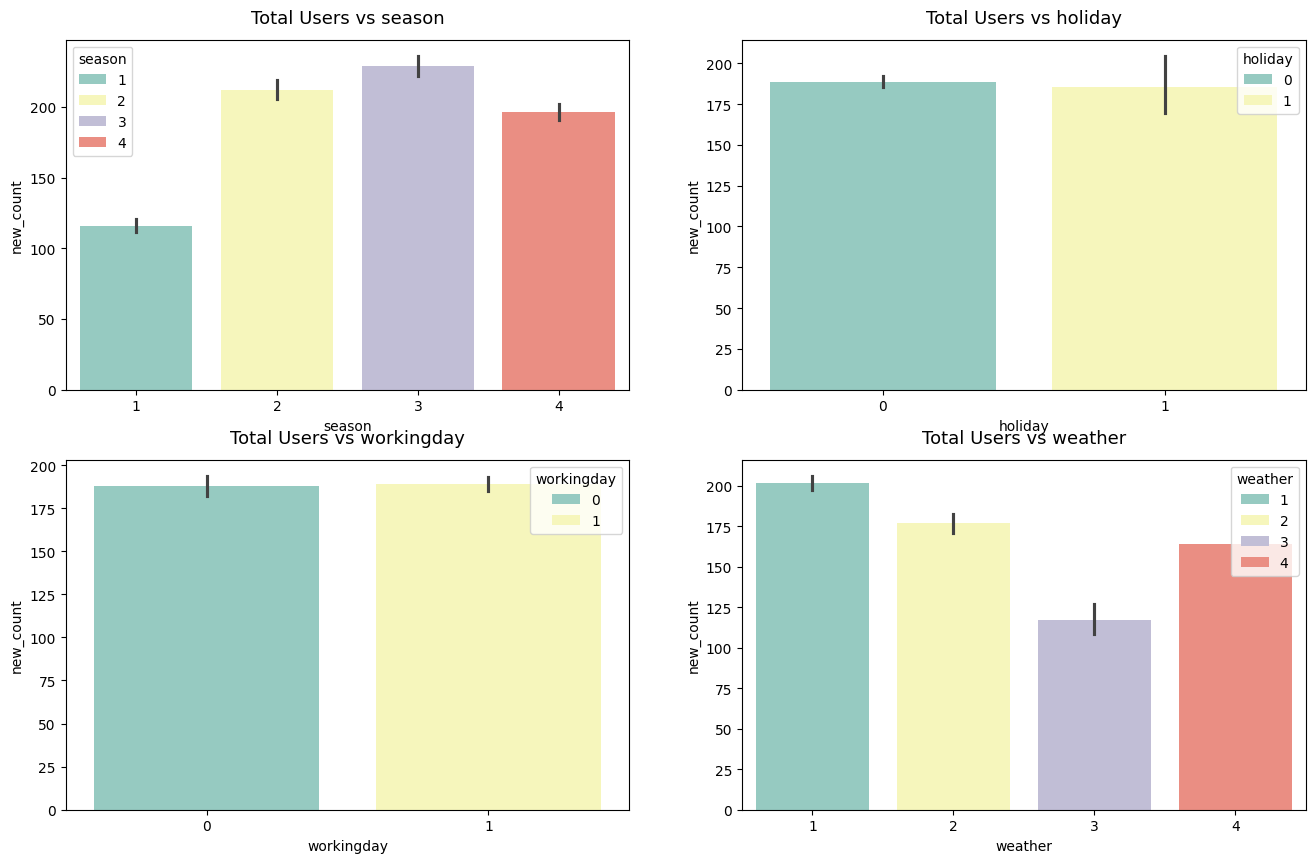

In [ ]:
col = ['season', 'holiday', 'workingday', 'weather']
row = 2
column = 2
ind = 0

fig, ax = plt.subplots(row,column,figsize = (16,10))

for i in range(row):
  for j in range(column):
    sns.barplot(data=data,x=col[ind],y='new_count',hue=col[ind],ax=ax[i,j],palette='Set3')
    ax[i,j].set_title(f"Total Users vs {col[ind]}", pad=12, fontsize=13)
    ind = ind + 1

# **Insights and Observations for Each Bar Graph**


- **Total Users vs Season**

Season 1 (Spring):

Observation: This season has the lowest number of total users.
Insight: Spring might not be the peak time for bicycle rentals, potentially due to weather conditions or other seasonal activities.

Season 2 (Summer):

Observation: There is a noticeable increase in users compared to Spring.

Insight: Summer seems to attract more bicycle users, likely due to favorable weather conditions and longer daylight hours.

Season 3 (Fall):

Observation: This season has the highest number of users.

Insight: Fall is the most popular season for bicycle rentals, possibly due to comfortable weather and various outdoor activities.

Season 4 (Winter):

Observation: The number of users drops compared to Fall but is higher than Spring.

Insight: Winter still sees a fair number of users, though possibly fewer due to colder weather conditions.

**- Total Users vs Holiday**

Non-Holiday (0):

Observation: Slightly more users on non-holidays.

Insight: Regular days see higher bicycle rentals, possibly due to routine commuting and activities.

Holiday (1):

Observation: Slightly fewer users compared to non-holidays.

Insight: Holidays might see a small drop in rentals as people engage in different leisure activities or stay home.

**- Total Users vs Working Day**

Non-Working Day (0):

Observation: Slightly fewer users on non-working days.

Insight: Non-working days see a marginal drop in bicycle rentals, possibly because fewer people commute for work.

Working Day (1):

Observation: Slightly more users on working days.

Insight: Working days see consistent bicycle rentals, likely due to routine commuting.

**- Total Users vs Weather**

Weather Condition 1 (Clear/Partly Cloudy):

Observation: Highest number of users.

Insight: Good weather conditions significantly boost bicycle rentals.

Weather Condition 2 (Mist/Cloudy):

Observation: Moderate number of users, lower than clear weather.

Insight: Adverse weather conditions reduce rentals but still maintain a fair number of users.

Weather Condition 3 (Light Rain/Snow):

Observation: Lower number of users.

Insight: Poor weather conditions like light rain or snow lead to a noticeable drop in rentals.

Weather Condition 4 (Heavy Rain/Storm):

Observation: Very few users.

Insight: Extremely unfavorable weather conditions (heavy rain/storm) significantly deter bicycle rentals.

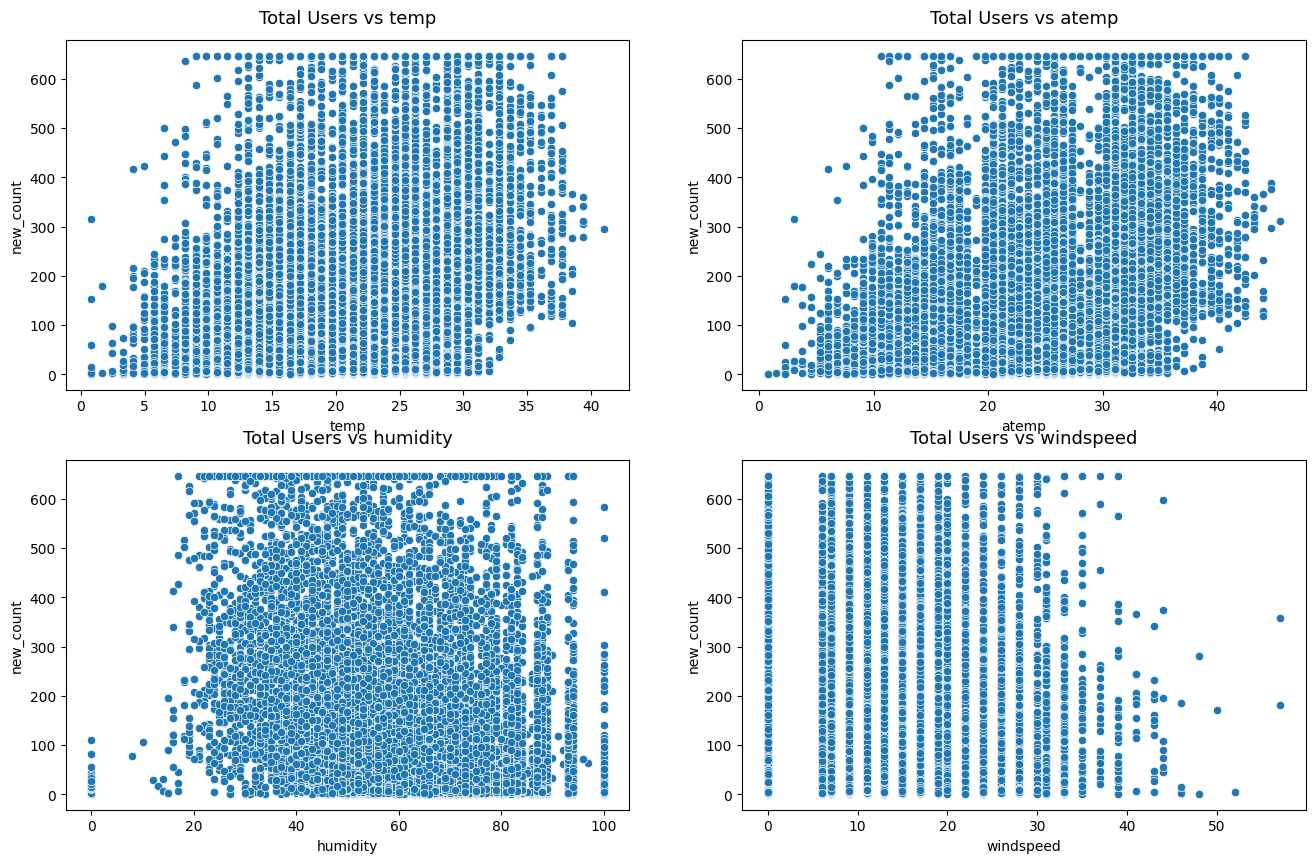

In [ ]:
col2 = ['temp', 'atemp', 'humidity', 'windspeed']
row = 2
column = 2
ind = 0

fig, ax = plt.subplots(row,column,figsize = (16,10))

for i in range(row):
  for j in range(column):
    sns.scatterplot(data=data,x=col2[ind],y='new_count', ax=ax[i,j])
    ax[i,j].set_title(f"Total Users vs {col2[ind]}", pad=12, fontsize=13)
    ind = ind + 1

# **Insights for Each Scatter Plot**

- **Total Users vs Temperature (temp)**

Observation: As the temperature increases, the number of users renting bicycles also tends to increase.

Trend: There is a noticeable positive correlation between temperature and the number of users.

Concentration: The highest concentration of users renting bicycles occurs when the temperature is between 15°C and 30°C.

Insight: People are more likely to rent bicycles in moderate to warm temperatures, which are comfortable for outdoor activities.

- **Total Users vs Apparent Temperature (atemp)**

Observation: Similar to the temperature plot, the apparent temperature also shows an increasing trend in the number of users with increasing temperature.

Trend: There is a positive correlation between apparent temperature and the number of users.

Concentration: A higher concentration of users renting bicycles when the apparent temperature is between 15°C and 30°C.

Insight: The "feels like" temperature significantly influences people's decision to rent bicycles, with moderate apparent temperatures being the most conducive for biking.

- **Total Users vs Humidity**

Observation: The number of users renting bicycles is relatively spread out across different humidity levels, with no clear trend.

Concentration: There is a slight concentration of users when the humidity is between 40% and 80%.

Insight: Humidity seems to have a less pronounced effect on bicycle rentals compared to temperature. However, extremely high or low humidity levels might slightly deter users.

- **Total Users vs Wind Speed**

Observation: The number of users renting bicycles tends to decrease as the wind speed increases.

Trend: There is a negative correlation between wind speed and the number of users.

Concentration: A noticeable concentration of users renting bicycles when the wind speed is below 20 km/h.

Insight: High wind speeds are likely to deter people from renting bicycles, while lower wind speeds are more favorable for biking activities.

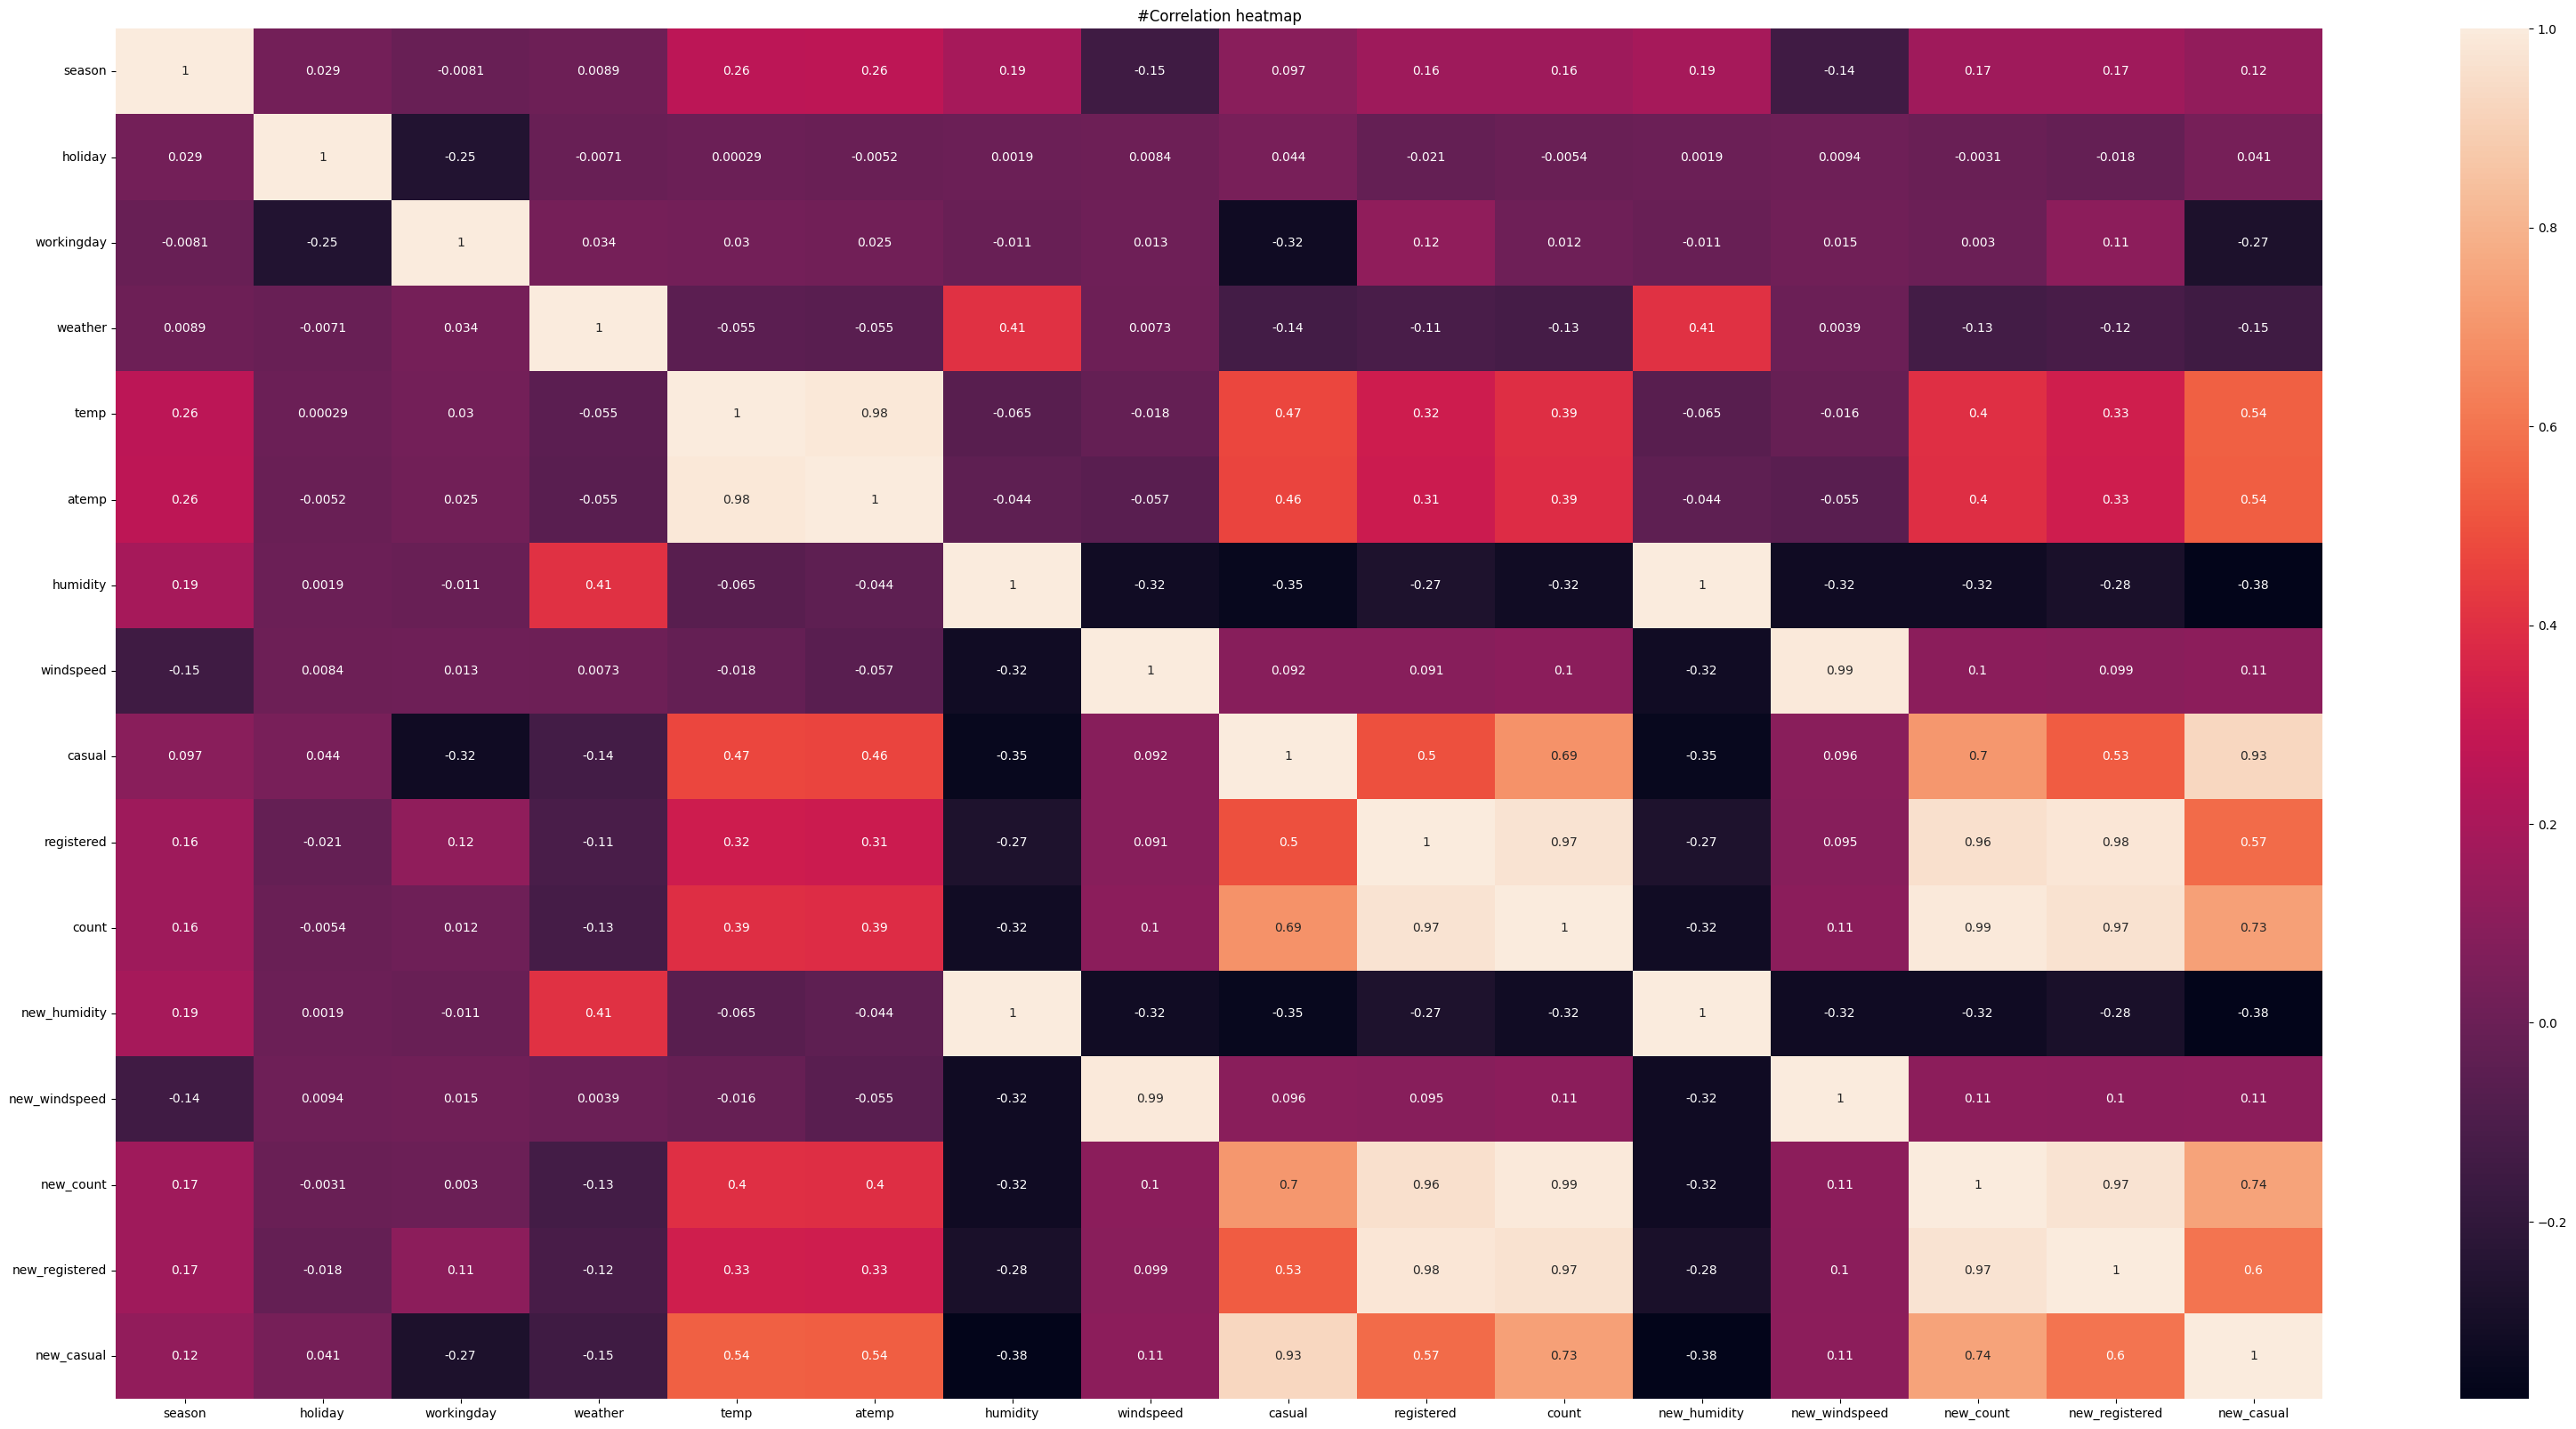

In [ ]:
#Correlation Heatmap

plt.figure(figsize = (40,20))
sns.heatmap(data=data.corr(numeric_only=True),annot=True)
plt.title("#Correlation heatmap")
plt.show()

# **Insights from the Correlation Heatmap**

1. Temperature and Apparent Temperature:
High Correlation: The correlation between temp (temperature) and atemp (apparent temperature) is very high (0.98). This indicates that these two variables are almost identical, meaning that the perceived temperature closely follows the actual temperature.

2. Casual and Registered Users:
Moderate Positive Correlation: The correlation between casual and registered users is moderate (0.5). This suggests that when the number of casual users increases, the number of registered users also tends to increase, although not as strongly.

3. Total Count and Registered Users:
High Positive Correlation: The total count of users (new_count) has a very high positive correlation with registered users (0.97). This indicates that registered users constitute a significant portion of the total rentals, reflecting their consistent usage pattern.

4. Total Count and Casual Users:
High Positive Correlation: The total count of users (new_count) also shows a high positive correlation with casual users (0.74), although it is slightly lower than that with registered users. This highlights the importance of casual users in overall rentals.

5. Weather and Humidity:
Moderate Positive Correlation: Weather has a moderate positive correlation with humidity (0.41), suggesting that certain weather conditions, such as mist or rain, are associated with higher humidity levels.

6. Windspeed and New Windspeed:
Very High Correlation: The correlation between windspeed and new_windspeed is extremely high (0.99), indicating that these two variables are essentially the same, likely due to how they are measured or recorded.

7. Negative Correlations:

- Working Day and Casual Users: There is a negative correlation between workingday and casual users (-0.32), suggesting that casual users are less likely to rent bicycles on working days.

- Temperature and Humidity: Temperature and humidity have a negative correlation (-0.24), indicating that higher temperatures are often associated with lower humidity levels.

8. Season and Temperature:
Moderate Positive Correlation: There is a moderate positive correlation (0.26) between season and temperature, suggesting that temperature varies with the season, with certain seasons being warmer.



---



# **Hypothesis Testing**



# Demand of bike rides on Weekdays and Weekends

In [ ]:
a = data[data['holiday']==1]
b = data[data['workingday']==1]

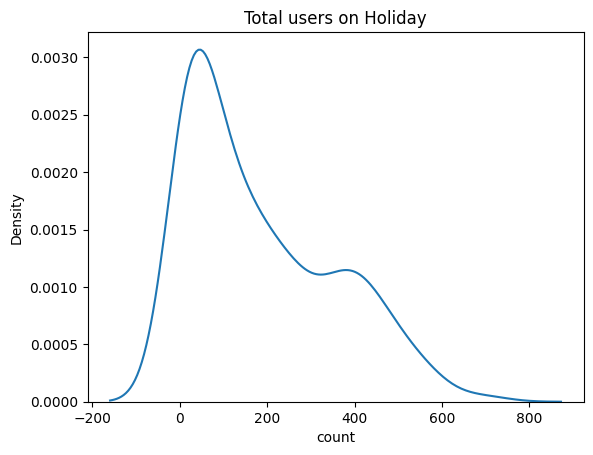

In [ ]:
sns.kdeplot(data=a, x='count')
plt.title('Total users on Holiday')
plt.show()

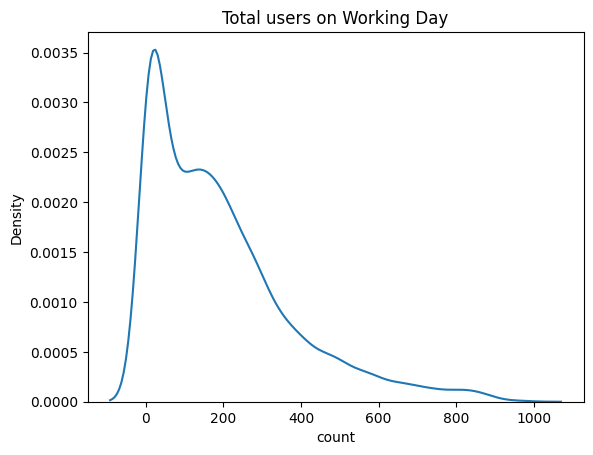

In [ ]:
sns.kdeplot(data=b, x='count')
plt.title('Total users on Working Day')
plt.show()

In [ ]:
#Ho : there is no significant difference between the no. of bike rides on Weekdays and Weekends
#Ha : there is a significant difference between the no. of bike rides on Weekdays and Weekends

#in order to test if there is any significance difference between bike rides on weekend and weekday, we will performe t test on independent variables

from scipy.stats import ttest_ind

tstat, pval = ttest_ind(a['count'],b['count'],alternative='two-sided')
tstat, pval

(-0.6702439407558054, 0.5027223424517107)

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, there is a significant difference between the no. of bike rides on Weekdays and Weekends')
else:
  print('We fail to reject the null hypothesis, there is no significant difference between the no. of bike rides on Weekdays and Weekends')

We fail to reject the null hypothesis, there is no significant difference between the no. of bike rides on Weekdays and Weekends


## **Insights and Recommendations**

# Summary:

Hypotheses:

Null Hypothesis (
𝐻
0
): There is no significant difference between the number of bike rides on weekdays and weekends.

Alternative Hypothesis (
𝐻
𝑎
): There is a significant difference between the number of bike rides on weekdays and weekends.

We found,

Test Results:
t-Statistic: -0.6702439407558054

p-Value: 0.5027223424517107

Interpretation:
The p-value (0.503) is greater than the significance level (
𝛼
=
0.05
).

Therefore, we fail to reject the null hypothesis.

Conclusion:
Result: There is no significant difference between the number of bike rides on weekdays and weekends.

# Insights:

User Behavior: The number of bike rides remains consistent across weekdays and weekends. This suggests that users might be using bikes for both commuting and leisure activities without a significant change in pattern.

Operational Consistency: Since there is no significant difference, operational demands, such as bike availability and maintenance schedules, can remain relatively stable throughout the week.

Marketing Strategies: There might be no need for targeted promotional campaigns specifically aimed at increasing weekend bike rides. Instead, a uniform strategy could be effective.

# Recommendations:

Uniform Service Quality: Maintain consistent service quality and bike availability throughout the week to meet user demands effectively.

User Engagement: Focus on general user engagement strategies rather than separate campaigns for weekdays and weekends.

Additional Research: Consider investigating other factors that might influence bike rental patterns, such as weather conditions, time of day, or specific events, to tailor services more effectively.



---



# The demand of bicycles on rent for different weather conditions

In [ ]:
# number of unique weather categories
data['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


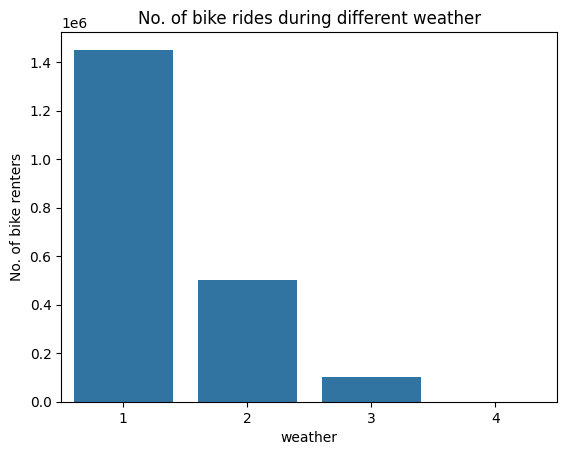

In [ ]:
m = data.groupby('weather')['new_count'].sum().reset_index()
sns.barplot(data=m,x='weather',y='new_count')
plt.ylabel('No. of bike renters')
plt.title('No. of bike rides during different weather')
plt.show()

Gaussian Test (Assumption 1)

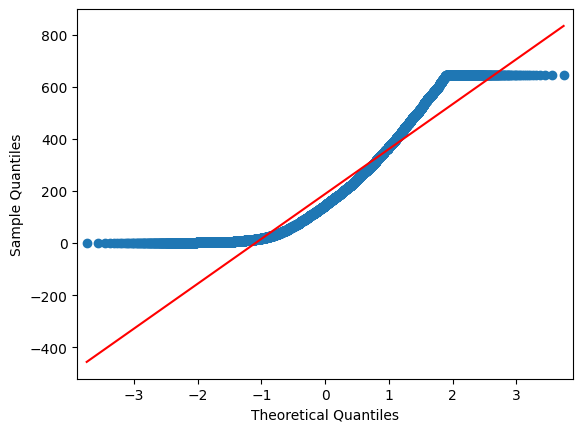

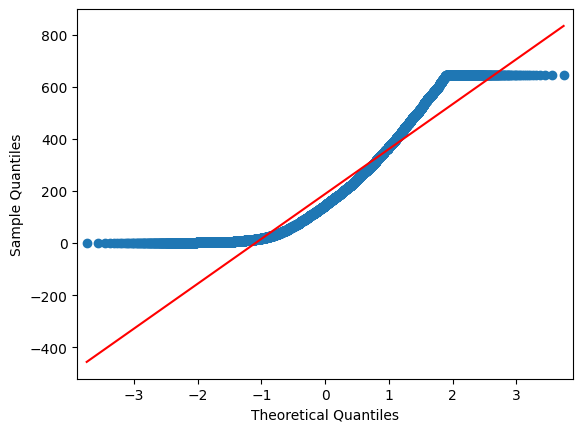

In [ ]:
#in order top perform a ANOVA to check variances between different groups, we need to test weather the data follows a gaussian distribution.
from statsmodels.graphics.gofplots import qqplot

qqplot(data['new_count'],line='s')

The points deviate from the red line, especially at both ends (tails), indicating that the data does not follow a normal distribution. These deviations suggest potential skewness or the presence of outliers.

Shapiro's Test (Assumption 2)

In [ ]:
#Ho : Data is gaussian
#Ha : Data is not gaussian

from scipy.stats import shapiro

stat, pval = shapiro(data['new_count'])
stat, pval

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


(0.8877828325283774, 2.2783732584893616e-66)

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, Data is not gaussian')
else:
  print('We fail to reject the null hypothesis, Data is gaussian')

We reject the null hypothesis, Data is not gaussian


Levene's Test (Assumption 3)

In [ ]:
g1 = data[data['weather']==1]

g2 = data[data['weather']==2]

g3 = data[data['weather']==3]

g4 = data[data['weather']==4]

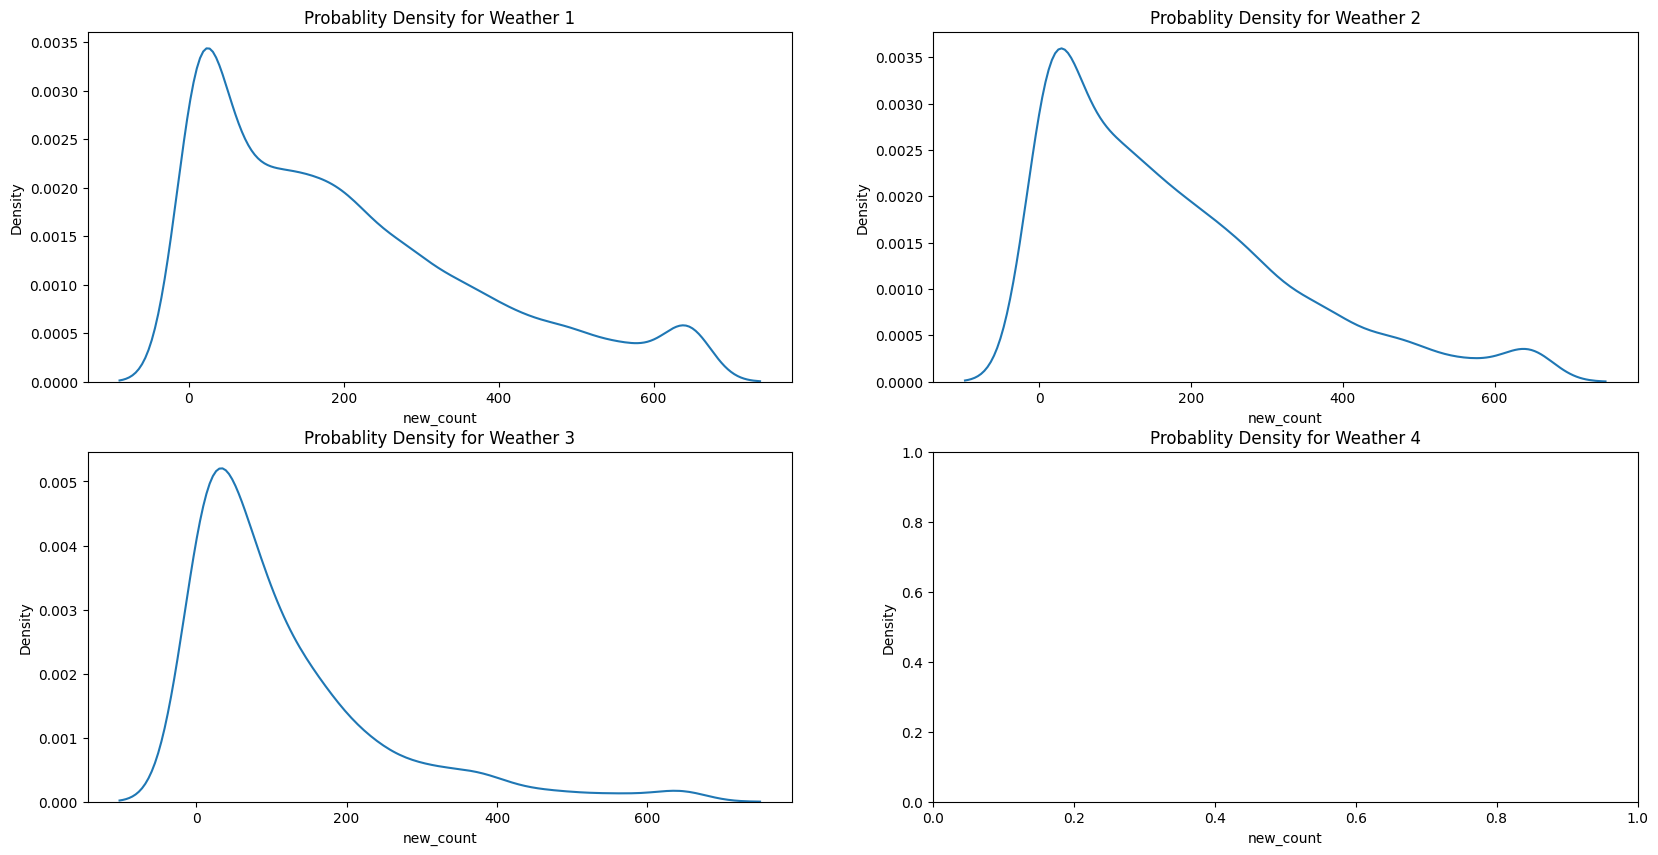

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(data=g1, x='new_count')
plt.title('Probablity Density for Weather 1')
plt.subplot(2,2,2)
sns.kdeplot(data=g2, x='new_count')
plt.title('Probablity Density for Weather 2')
plt.subplot(2,2,3)
sns.kdeplot(data=g3, x='new_count')
plt.title('Probablity Density for Weather 3')
plt.subplot(2,2,4)
sns.kdeplot(data=g4, x='new_count',warn_singular=False)
plt.title('Probablity Density for Weather 4')
plt.show()

<ipython-input-37-1d5efdf39898>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=g4, x='new_count')


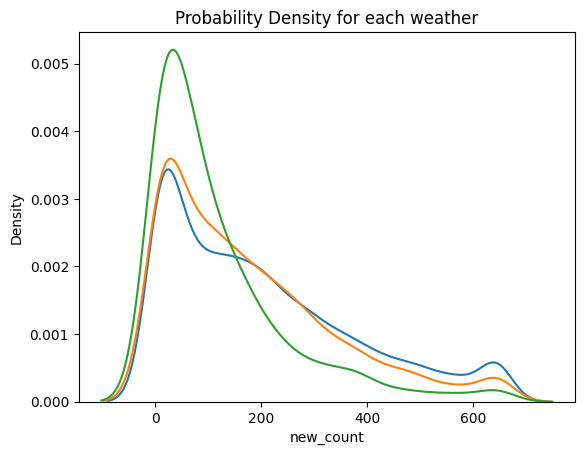

In [ ]:
sns.kdeplot(data=g1, x='new_count')
sns.kdeplot(data=g2, x='new_count')
sns.kdeplot(data=g3, x='new_count')
sns.kdeplot(data=g4, x='new_count')
plt.title('Probability Density for each weather')
plt.show()

In [ ]:
#Ho:Variances are equal
#Ha: Variances are not equal

from scipy.stats import levene

i_stat, pval = levene(g1['count'],g2['count'],g3['count'],g4['count'])
pval = float(format(pval,'.20f'))
i_stat, pval

(54.85106195954556, 0.0)

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, variances are not equal')
else:
  print('We fail to reject the null hypothesis, variances are equal')

We reject the null hypothesis, variances are not equal


Since all the assumptions have failed for performing ANOVA, we will do Kruskal Wallis Test

In [ ]:
#Ho: The population of all weather groups (1,2,3,4) have same median
#Ha : At least one of the populations has different median

from scipy.stats import kruskal

stat, pval = kruskal(g1['count'],g2['count'],g3['count'])

stat, pval

(204.95566833068537, 3.122066178659941e-45)

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, at least one of the populations has different median')
else:
  print('We fail to reject the null hypothesis, the population of all groups have same median')

We reject the null hypothesis, at least one of the populations has different median


## **Insights and Recommendations**

# Summary:

Hypotheses:

Null Hypothesis (
𝐻
0
): The populations of all weather groups (1, 2, 3, 4) have the same median.

Alternative Hypothesis (
𝐻
𝑎
): At least one of the populations has a different median.

Test Results:
Kruskal-Wallis H Statistic: 204.95566833068537

p-Value: 0.0 (effectively less than any commonly used significance level, such as 0.05)

Interpretation:
The p-value is 0.0, which is much less than the significance level (
𝛼
=
0.05
).

Therefore, we reject the null hypothesis.

Conclusion:
Result: There is a significant difference in the medians of at least one weather group compared to the others.

# Insights:

Weather Impact on Bike Rides: The significant difference suggests that weather conditions have a notable impact on the number of bike rides. Different weather groups do not all have the same median number of bike rides, indicating varying user behaviors across different weather conditions.

# Recommendations:

- Tailored Strategies for Different Weather Conditions:

 - Weather Group 1 (Clear/Partly Cloudy): Optimize bike availability and promotions during clear weather, as this condition likely has higher ridership.

 - Weather Group 2 (Mist/Cloudy): Maintain steady operations, possibly with slight adjustments based on historical usage patterns.

  - Weather Group 3 (Light Rain/Snow): Implement strategies to mitigate reduced ridership, such as offering discounts or ensuring safety measures.

  - Weather Group 4 (Heavy Rain/Storm): Prepare for significantly lower ridership. Focus on maintaining essential services and ensuring bike and rider safety.

- Marketing and Promotions:

Use weather forecasts to plan targeted marketing campaigns. Encourage bike rentals during favorable weather conditions with promotions and special offers.
Consider flexible pricing strategies that account for expected lower ridership during adverse weather conditions.

- Infrastructure and Safety Measures:

Improve infrastructure to handle varying weather conditions, such as providing covered parking or enhanced bike maintenance services. Ensure clear communication about safety measures and bike availability during different weather conditions.



---



# Pair wise T test for each type of weather

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
lst = [g1,g2,g3,g4]

for i,j in enumerate(lst):
  for a,b in enumerate(lst):
    if i!=a:
      stat, pvalue = ttest_ind(j['new_count'],b['new_count'],alternative='greater')
      lstn = ['weather 1',' weather 2','weather 3','weather 4']

      print(f'Bike Rides in {lstn[i]} vs {lstn[a]} ')

      if pvalue < 0.05:
        print(f'We reject the null hypothesis, there are more bike rides during {lstn[i]} than {lstn[a]}')
      else:
        print(f'We fail to reject the null hypothesis, there are same bike rides during {lstn[i]} and {lstn[a]}')

      print(' ')


Bike Rides in weather 1 vs  weather 2 
We reject the null hypothesis, there are more bike rides during weather 1 than  weather 2
 
Bike Rides in weather 1 vs weather 3 
We reject the null hypothesis, there are more bike rides during weather 1 than weather 3
 
Bike Rides in weather 1 vs weather 4 
We fail to reject the null hypothesis, there are same bike rides during weather 1 and weather 4
 
Bike Rides in  weather 2 vs weather 1 
We fail to reject the null hypothesis, there are same bike rides during  weather 2 and weather 1
 
Bike Rides in  weather 2 vs weather 3 
We reject the null hypothesis, there are more bike rides during  weather 2 than weather 3
 
Bike Rides in  weather 2 vs weather 4 
We fail to reject the null hypothesis, there are same bike rides during  weather 2 and weather 4
 
Bike Rides in weather 3 vs weather 1 
We fail to reject the null hypothesis, there are same bike rides during weather 3 and weather 1
 
Bike Rides in weather 3 vs  weather 2 
We fail to reject the 

# Summary and Insights:

**Weather 1 (Clear/Partly Cloudy):**

- Dominates Usage: Significantly higher bike rides than in Weather 2 (Mist/Cloudy) and Weather 3 (Light Rain/Snow).

- Comparable to Weather 4 (Heavy Rain/Storm): No significant difference between Weather 1 and Weather 4, though this might be due to limited data points for Weather 4.

**Weather 2 (Mist/Cloudy):**

- Moderate Usage: More bike rides than Weather 3 but comparable to Weather 4.
Comparable to Weather 1: No significant difference observed despite slightly lower counts.

**Weather 3 (Light Rain/Snow):**

- Lower Usage: Fewer bike rides than Weather 1 and Weather 2.
Comparable to Weather 4: No significant difference, possibly due to similarly adverse conditions.

**Weather 4 (Heavy Rain/Storm):**

Lowest Usage: Comparable to Weather 3 but consistently lower than Weather 1 and Weather 2.
This category has very few data points, making it less reliable for conclusions.

# The demand of bicycles on rent for different Seasons

In [ ]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
s1 = data[data['season']==1]

s2 = data[data['season']==2]

s3 = data[data['season']==3]

s4 = data[data['season']==4]

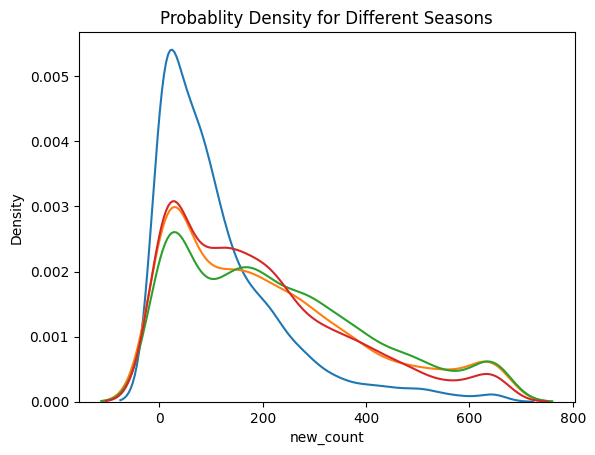

In [ ]:
sns.kdeplot(data=s1, x='new_count')
sns.kdeplot(data=s2, x='new_count')
sns.kdeplot(data=s3, x='new_count')
sns.kdeplot(data=s4, x='new_count')
plt.title('Probablity Density for Different Seasons')
plt.show()

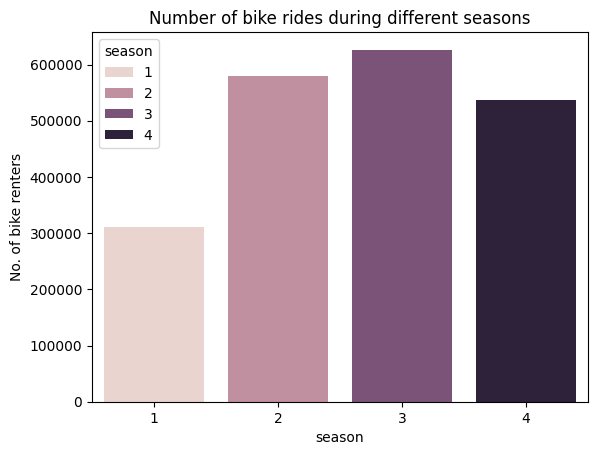

In [ ]:
m = data.groupby('season')['new_count'].sum().reset_index()
sns.barplot(data=m,x='season',y='new_count',hue='season')
plt.ylabel('No. of bike renters')
plt.title('Number of bike rides during different seasons')
plt.show()

In [ ]:
#Ho: The population of all groups have same median
#Ha : At least one of the populations has different median

from scipy.stats import kruskal

stat, pval = kruskal(s1['new_count'],s2['new_count'],s3['new_count'],s4['new_count'])
stat, pval

(699.2817665514561, 3.0045514163996123e-151)

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, at least one of the populations has different median')
else:
  print('We fail to reject the null hypothesis, the population of all groups have same median')

We reject the null hypothesis, at least one of the populations has different median


## **Insights and Recommendations**

# Observations:

Hypotheses:

Null Hypothesis (
𝐻
0
): The populations of all weather groups (1, 2, 3, 4) have the same median.

Alternative Hypothesis (
𝐻
𝑎
): At least one of the populations has a different median.

Test Results:
Kruskal-Wallis H Statistic: 204.95566833068537

p-Value: 0.0 (extremely small, effectively zero)

Interpretation:
The p-value is 0.0, which is much less than the significance level (
𝛼
=
0.05
).

Therefore, we reject the null hypothesis.


Result: There is a significant difference in the medians of at least one weather group compared to the others.

# Insights:

Weather Impact on Bike Rides: The significant difference suggests that weather conditions have a notable impact on the number of bike rides. Different weather groups have different median bike rental counts, indicating that user behavior varies significantly with weather conditions.

Weather Group Analysis: To pinpoint which specific weather groups differ significantly, further analysis such as pairwise comparisons or post-hoc tests is recommended.

# Recommendations:

- Tailored Operational Strategies for Different Weather Conditions:

Weather Group 1 (Clear/Partly Cloudy): Increase bike availability and consider promotional activities during clear weather as this condition is likely associated with higher ridership.

Weather Group 2 (Mist/Cloudy): Maintain steady operations with slight adjustments based on historical usage patterns, possibly prepare for moderate ridership.

Weather Group 3 (Light Rain/Snow): Implement strategies to mitigate reduced ridership, such as offering discounts, promoting weather-appropriate gear, and ensuring safety measures are in place.

Weather Group 4 (Heavy Rain/Storm): Prepare for significantly lower ridership, focusing on maintaining essential services and ensuring bike and rider safety.

- Marketing and Promotions:

Utilize weather forecasts to plan targeted marketing campaigns. Encourage bike rentals during favorable weather conditions with special offers and promotions.

Consider flexible pricing strategies to account for expected lower ridership during adverse weather conditions.

- Infrastructure and Safety Measures:

Improve infrastructure to handle varying weather conditions, such as providing covered parking or enhanced bike maintenance services.

Ensure clear communication about safety measures and bike availability during different weather conditions.



---



Pair T test During different seasons

In [ ]:
lst = [s1,s2,s3,s4]

for i,j in enumerate(lst):
  for a,b in enumerate(lst):
    if i!=a:
      stat, pvalue = ttest_ind(j['new_count'],b['new_count'],alternative='greater')
      lstn = ['season 1',' season 2','season 3','season 4']

      print(f'Bike Rides in {lstn[i]} vs {lstn[a]} ')

      if pvalue < 0.05:
        print(f'We reject the null hypothesis, there are more bike rides during {lstn[i]} than {lstn[a]}')
      else:
        print(f'We fail to reject the null hypothesis, there are same bike rides during {lstn[i]} and {lstn[a]}')

      print(' ')


Bike Rides in season 1 vs  season 2 
We fail to reject the null hypothesis, there are same bike rides during season 1 and  season 2
 
Bike Rides in season 1 vs season 3 
We fail to reject the null hypothesis, there are same bike rides during season 1 and season 3
 
Bike Rides in season 1 vs season 4 
We fail to reject the null hypothesis, there are same bike rides during season 1 and season 4
 
Bike Rides in  season 2 vs season 1 
We reject the null hypothesis, there are more bike rides during  season 2 than season 1
 
Bike Rides in  season 2 vs season 3 
We fail to reject the null hypothesis, there are same bike rides during  season 2 and season 3
 
Bike Rides in  season 2 vs season 4 
We reject the null hypothesis, there are more bike rides during  season 2 than season 4
 
Bike Rides in season 3 vs season 1 
We reject the null hypothesis, there are more bike rides during season 3 than season 1
 
Bike Rides in season 3 vs  season 2 
We reject the null hypothesis, there are more bike r

# Key Insights:

**Fall (Season 3):**

Fall sees the highest demand for bike rides. It has significantly more rides than spring (Season 1), summer (Season 2), and winter (Season 4).

**Summer (Season 2):**

Summer has more rides than spring and winter, showing moderate demand.
However, summer has fewer rides compared to fall, indicating it is a secondary peak period.

**Winter (Season 4):**

Winter has more rides than spring but aligns with summer in terms of demand.
The demand is lower compared to fall, making winter a moderate-demand period.

**Spring (Season 1):**

Spring has the lowest bike demand among all seasons.
It has significantly fewer rides compared to summer, fall, and winter.

**Seasonal Similarities:**

Winter and summer have similar demand levels, while spring consistently lags behind other seasons. Fall stands out as the period of highest usage.

# Recommendation:

Fall (Season 3) is the most critical period for YULU's bike-sharing business, representing the highest demand, while spring (Season 1) shows minimal activity. Strategic resource allocation and seasonal promotions can enhance business performance across all seasons.



---



Effect of the Weather conditions during different Seasons

In [ ]:
#Ho: There is no relationship between weather and season
#Ha : There is a relationship between weather and season

#Since both are categorical variables, we will proceed with Chi Square test

pd.crosstab(data['weather'],data['season'], margins=True, margins_name='Total')

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, pval, dof, arr = chi2_contingency(pd.crosstab(data['weather'],data['season']))
p_val = format(pval,'.20f')
stat, pval, p_val, dof, arr

(49.15865559689363,
 1.5499250736864862e-07,
 '0.00000015499250736865',
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [ ]:
if pval < 0.05:
  print('We reject the null hypothesis, there is a relationship between weather and season')

else:
  print('We fail to reject the null hypothesis, there is no relationship between weather and season')

We reject the null hypothesis, there is a relationship between weather and season


## **Insights and Recommendations**

# Observations:

Hypotheses:

Null Hypothesis (
𝐻
0
): There is no relationship between weather and season.

Alternative Hypothesis (
𝐻
𝑎
): There is a relationship between weather and season.

Test Results:
Chi-Square Statistic: 49.15865559689363

p-Value:
1.5499250736864862
×
1
0
−
7
 (effectively zero)

Degrees of Freedom (dof): 9

Interpretation:
The p-value is extremely small (much less than the significance level of 0.05).

Therefore, we reject the null hypothesis.

Conclusion:
Result: There is a significant relationship between weather and season.

# Insights:

Weather Condition Distribution: The distribution of weather conditions varies significantly across different seasons. Clear weather (Weather 1) is most common in all seasons, but its frequency varies, being highest in Fall (Season 3).

Mist/Cloudy Weather: This condition is relatively evenly distributed but shows slight variation, being more common in Winter (Season 4).

Light Rain/Snow: The frequency of light rain/snow is fairly consistent across seasons, with no significant peaks.

Heavy Rain/Storm: Extremely rare, with only one occurrence in Spring (Season 1).

# Recommendations:

- Seasonal Planning:

  - Spring (Season 1): Prepare for varying weather conditions, including occasional heavy rain. Ensure bike availability and maintenance are optimized for this season.

  - Summer (Season 2): Focus on clear weather conditions. This season has high rental potential due to favorable weather.

  - Fall (Season 3): Maximize bike availability and promotions, as this season sees the highest frequency of clear weather conditions.

  - Winter (Season 4): Plan for mist/cloudy weather. Ensure safety measures and maintenance are prioritized to handle these conditions.

- Marketing Strategies:

Utilize weather forecasts to plan targeted marketing campaigns. Promote biking during seasons with higher instances of clear weather.
Implement flexible pricing strategies to encourage rentals during less favorable weather conditions.

- Infrastructure and Maintenance:
Invest in infrastructure improvements that enhance resilience to varying weather conditions, such as covered parking and improved drainage systems.

- User Communication:
Educational Campaigns: Educate users on the benefits and safety precautions of riding in different weather conditions.

# Correlation between weather conditions and demand on bikes rented

In [ ]:
data[['temp','count']].corr()

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(data['temp'],data['count'])

PearsonRResult(statistic=0.3944536449672492, pvalue=0.0)

# New Insights:

Temperature Influence: Higher temperatures are associated with an increase in bike rentals. This implies that users prefer riding bicycles in warmer weather.

# Recommendations:

Enhanced User Experience:

Heat Adaptation: During peak temperature periods, ensure bikes and docking stations are equipped to handle higher usage. This might include providing shaded areas, water dispensers, and cooling stations.

Comfortable Riding Gear: Encourage users to wear appropriate gear for warmer weather. Offer promotions on sun-protection gear and lightweight clothing.

Targeted Promotions:

Seasonal Campaigns: Run marketing campaigns highlighting the joy of biking in warm weather. Offer discounts or incentives during peak temperature months to attract more users.

Weather-Based Notifications: Use weather forecasts to send notifications about favorable biking conditions, encouraging users to rent bikes on warmer days.

Operational Adjustments:

Resource Allocation: Increase bike availability and maintenance efforts during warmer periods to meet the higher demand. Ensure that more bikes are in top condition during the summer months.

Flexible Pricing: Consider dynamic pricing models that offer lower rates during less favorable weather and standard rates during peak temperatures to balance usage.

In [ ]:
data[['humidity','count']].corr()

,humidity,count
humidity,1.000000,-0.317371
count,-0.317371,1.000000


In [ ]:
pearsonr(data['humidity'],data['count'])

PearsonRResult(statistic=-0.3173714788765946, pvalue=2.9215416637405304e-253)

# New Insights:

Humidity Impact: Higher humidity levels are associated with a decrease in bike rentals. This suggests that users are less likely to rent bicycles in more humid conditions, possibly due to discomfort or perceived difficulty in riding.

# Recommendations:

Enhanced User Experience:

During high humidity periods, provide measures to enhance user comfort, such as offering discounts on hydration packs or promoting routes with shaded areas.

Targeted Promotions:

Offer special promotions or discounts during high humidity days to encourage rentals despite the less favorable conditions. Use weather forecasts to send alerts and incentivize users with time-sensitive offers when humidity levels are lower.

Operational Adjustments:

Adjust bike maintenance schedules to ensure bikes are in optimal condition during drier periods when rentals are likely higher. Ensure adequate bike availability during periods of lower humidity to meet the increased demand.

In [ ]:
data[['windspeed','count']].corr()

,windspeed,count
windspeed,1.000000,0.101369
count,0.101369,1.000000


In [ ]:
pearsonr(data['windspeed'],data['count'])

PearsonRResult(statistic=0.10136947021033282, pvalue=2.898407203154636e-26)

# Insights:

Weak Positive Correlation: Windspeed has a very weak positive correlation (
𝑟
=
0.101
r=0.101) with count. This suggests windspeed slightly influences user demand but is not a dominant factor.

# Recommendations

Leverage Weather APIs: Integrate real-time weather forecasts to predict demand. Windspeed, combined with other weather factors (e.g., temperature, rain), could help refine deployment strategies. Investigate specific windspeed ranges (e.g., calm, breezy, windy) to identify tipping points where demand shifts significantly.For instance, very high winds may reduce user demand due to discomfort or safety concerns.

Wind-Friendly Accessories: Offer add-ons like windshields for bikes or suggest clothing for windy conditions, especially in high-demand urban zones.
Targeted Messaging: Use windspeed data to craft personalized marketing. Example: On breezy days, highlight messages like, "Perfect day for a ride with YULU—breezy and refreshing!"
Fleet Optimization:

Dynamic Fleet Allocation: Deploy more bikes in areas where windspeed is optimal (low to moderate). Avoid overstocking in high-wind areas where demand might drop.

Gamify the Experience: Introduce challenges or rewards for riding in certain wind conditions. Example: "Conquer the Wind" badge for users riding on windy days.Offer discounts on low-demand windy days to incentivize usage.

# **Conclusion:**

YULU's demand for shared electric cycles is primarily influenced by weather, temperature, and seasonality. By leveraging adaptive operational strategies, weather-targeted marketing, and dynamic pricing, YULU can maximize user engagement and optimize fleet utilization. This holistic approach will ensure steady growth and improved customer satisfaction in the Indian market.

In [ ]:
#Ignore
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')
print('dsc')

dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
dsc
